In [1]:
import matplotlib.pyplot as plt
from stylesynth import StyleSynth

In [2]:
ss = StyleSynth()

INFO:StyleSynth_Logger:Loading Fashion MNIST dataset...
INFO:StyleSynth_Logger:Dataset loaded
INFO:StyleSynth_Logger:Training U-Net for noise prediction...
  0%|          | 0/12 [00:00<?, ?it/s]INFO:StyleSynth_Logger:Epoch 1 / 12
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.1256345510482788


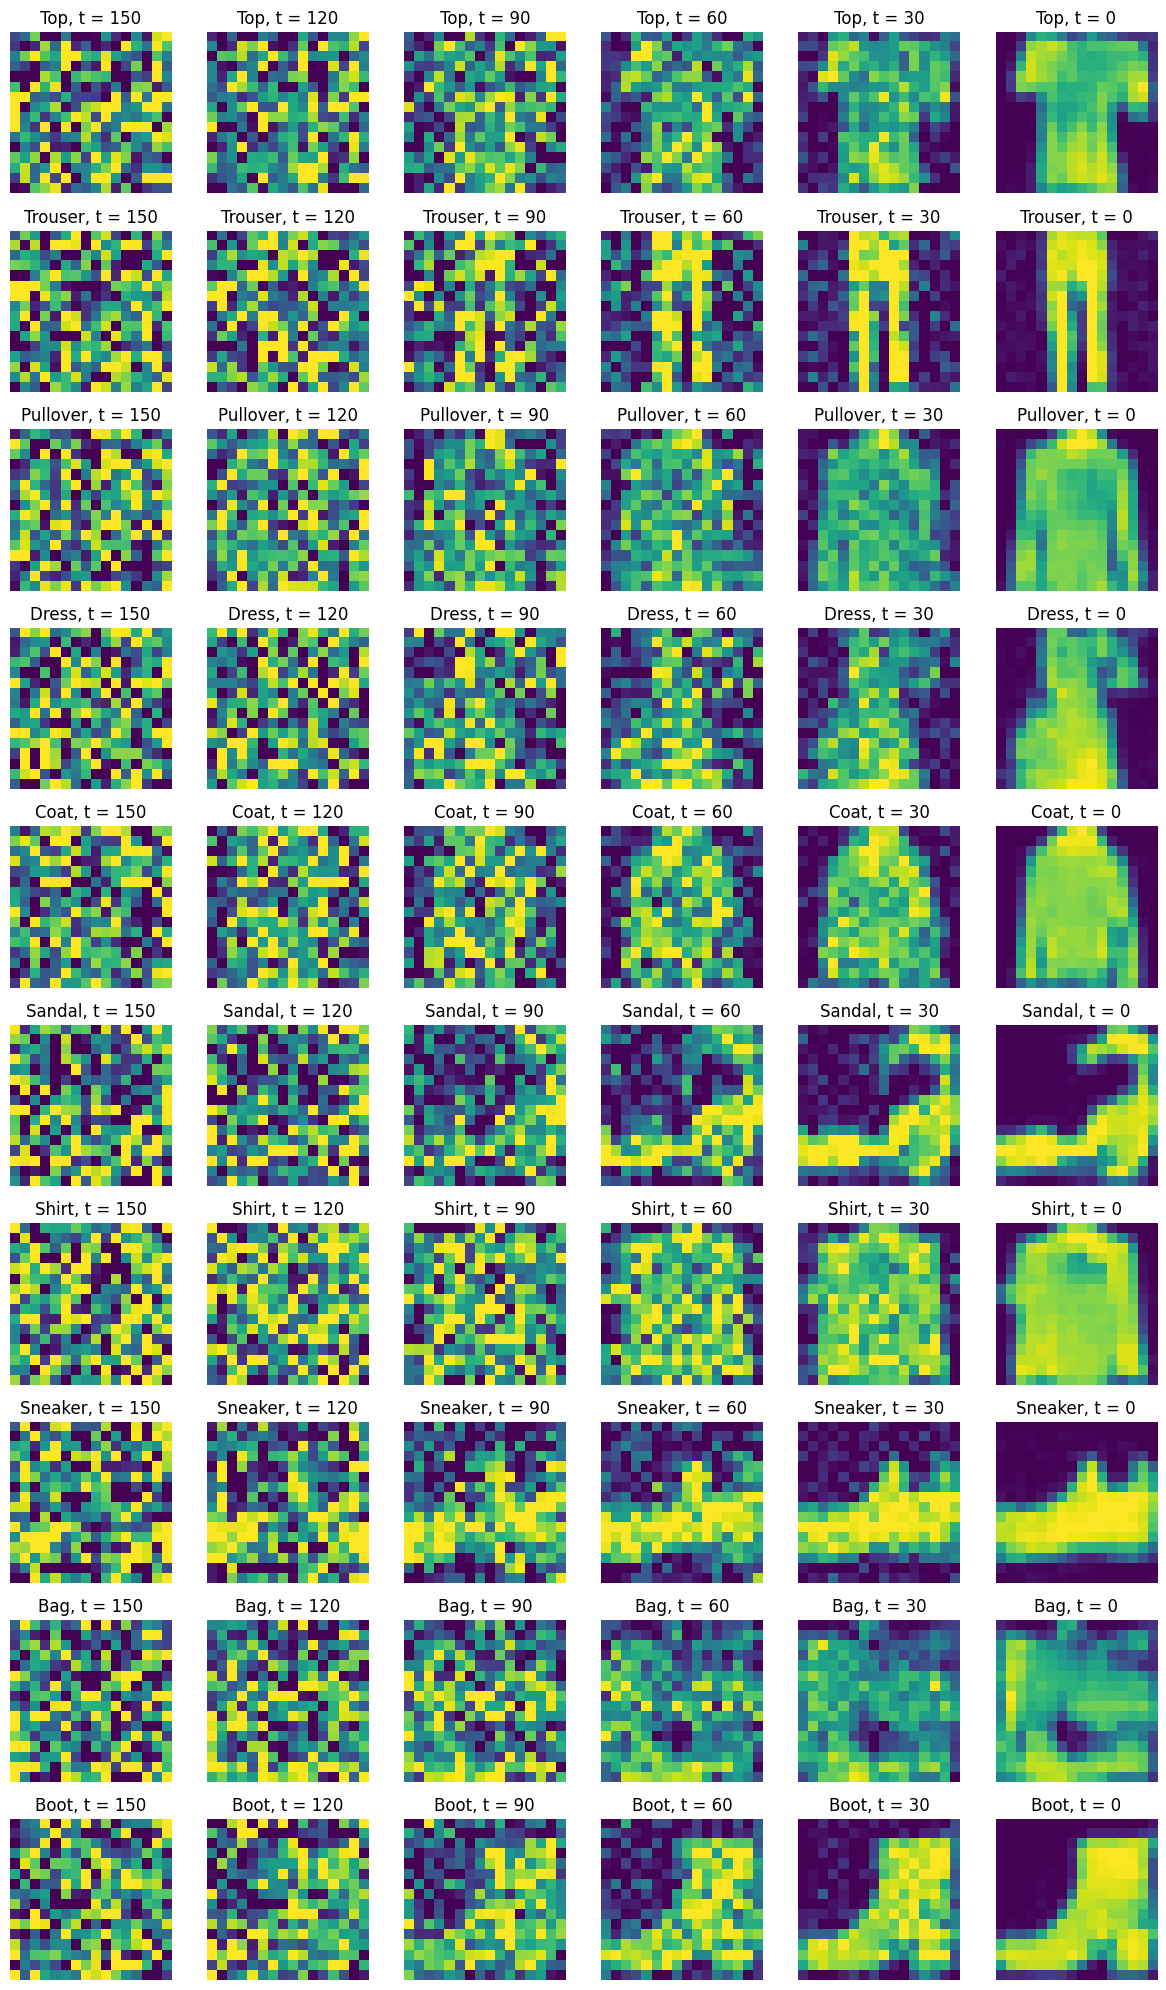

 42%|████▏     | 5/12 [02:09<02:56, 25.28s/it]INFO:StyleSynth_Logger:Epoch 6 / 12
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.08746207505464554


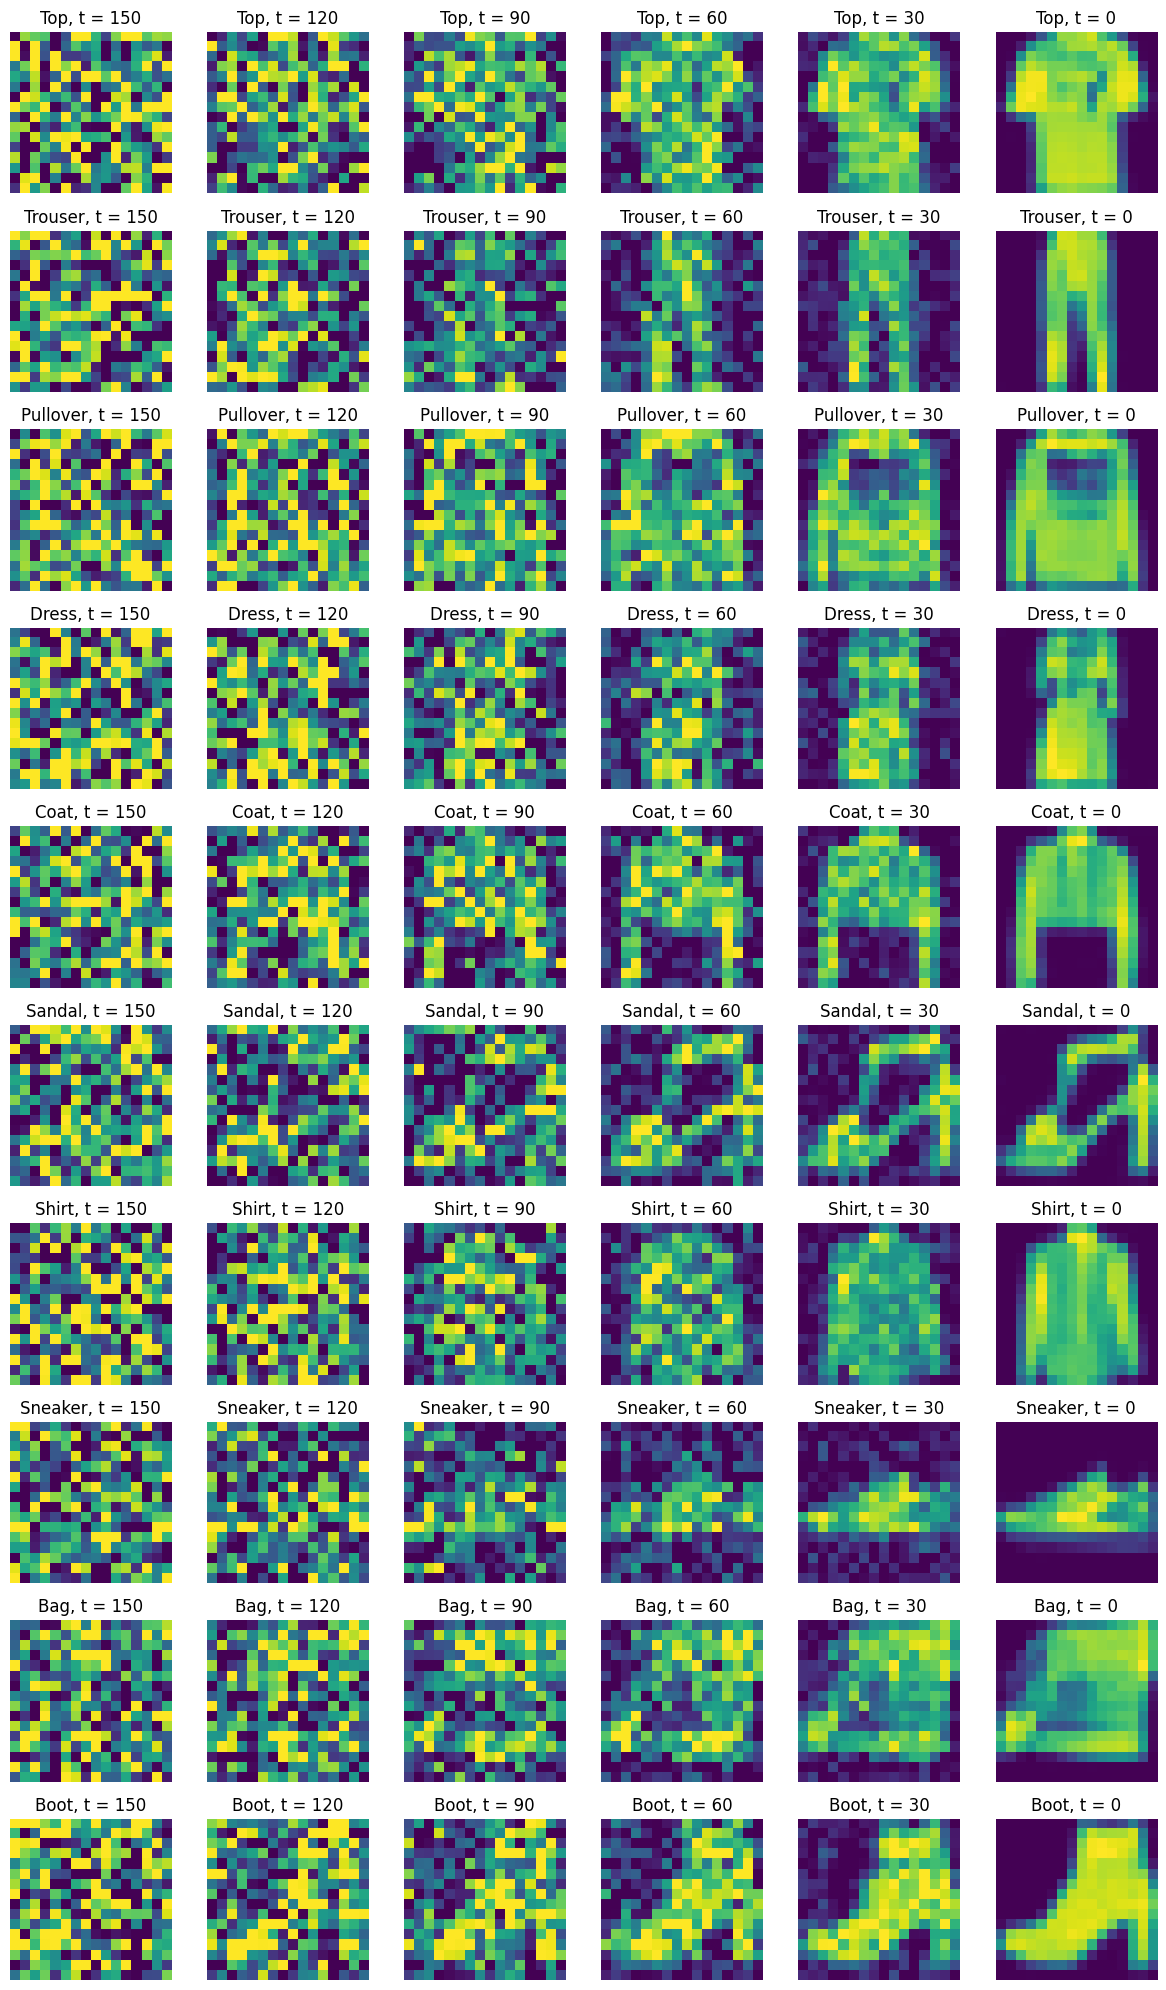

 92%|█████████▏| 11/12 [04:43<00:25, 25.38s/it]INFO:StyleSynth_Logger:Epoch 12 / 12
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.08050695061683655


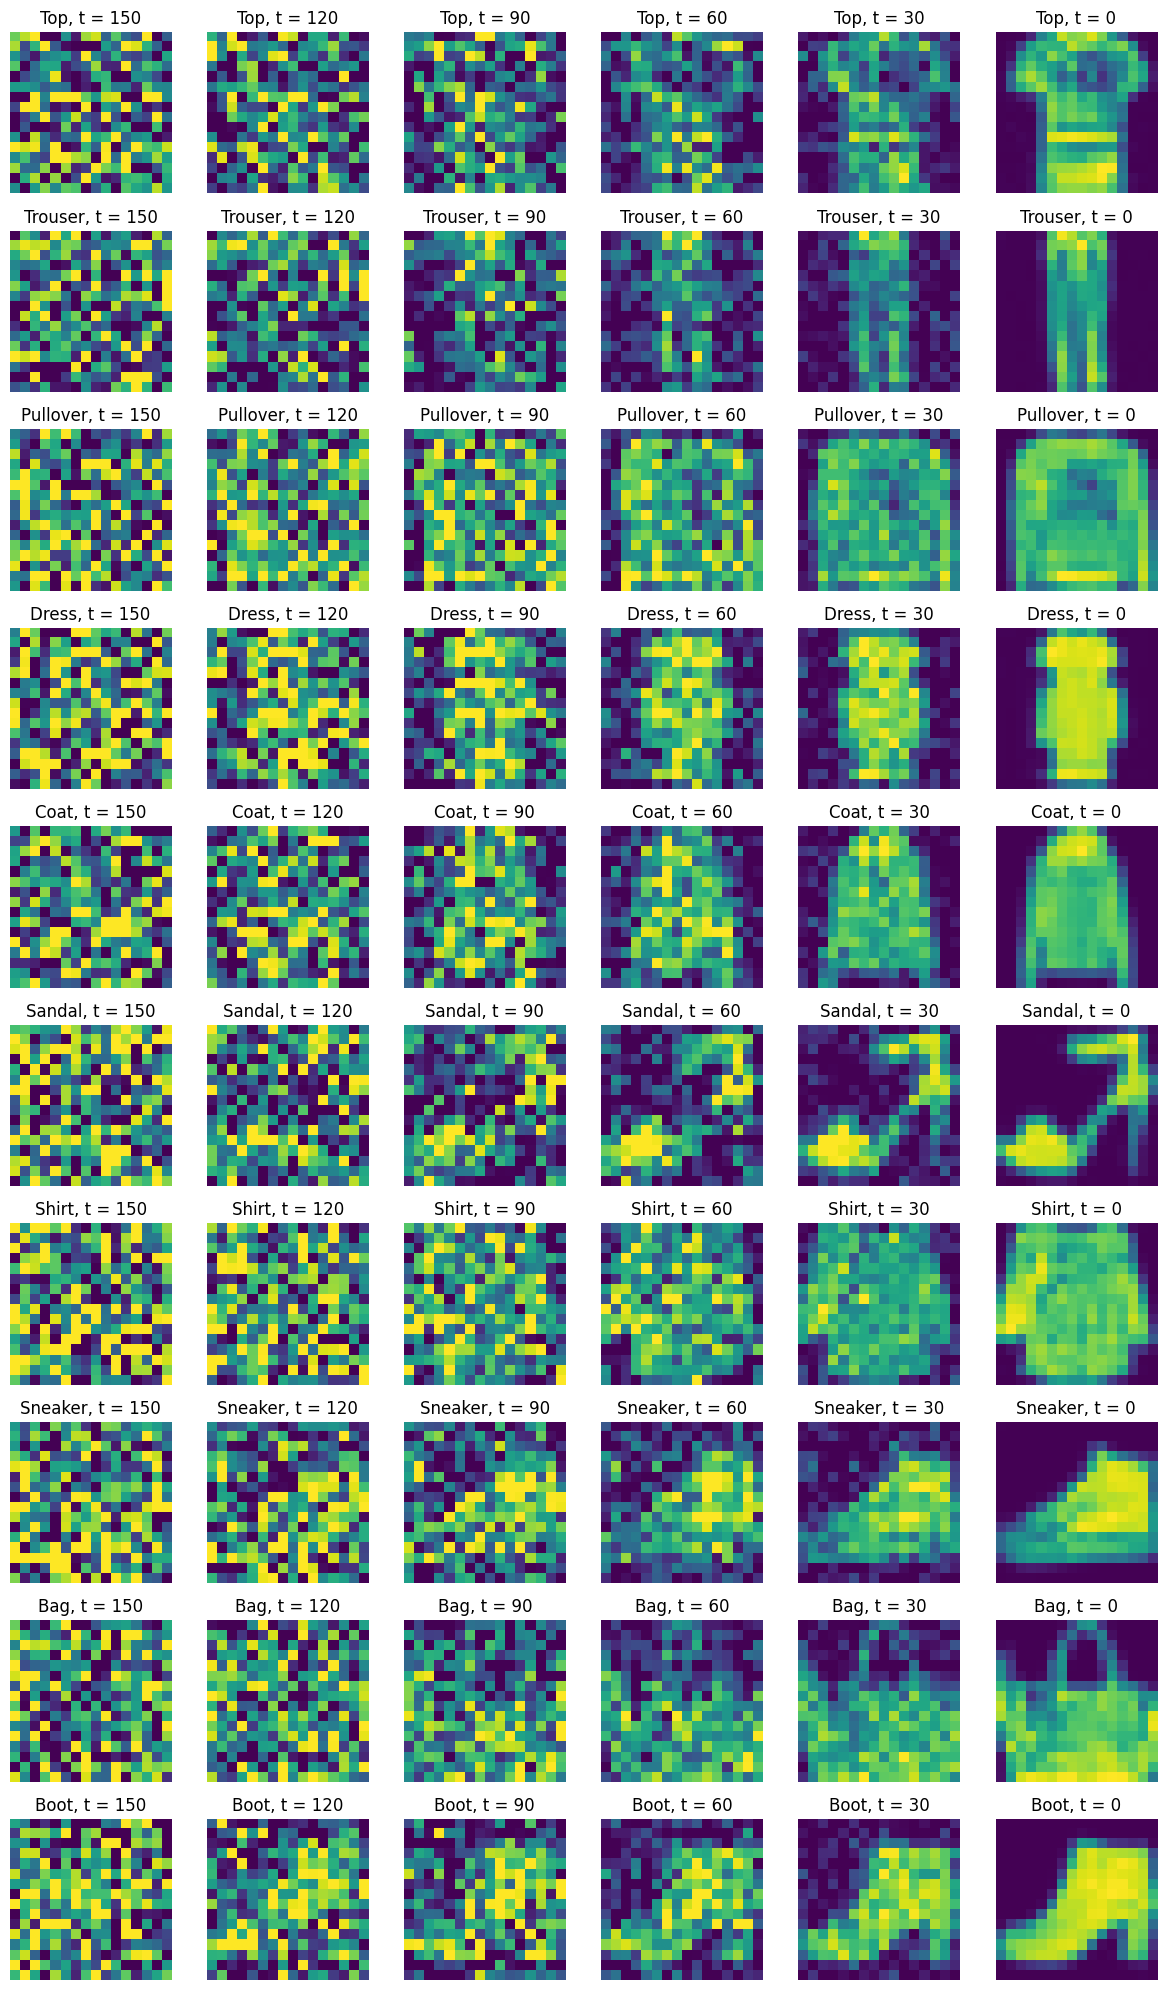

100%|██████████| 12/12 [05:13<00:00, 26.09s/it]
INFO:StyleSynth_Logger:Training complete


In [3]:
ss.train(img_size=16, epochs=12, batch_size=128, vis_interval=6)

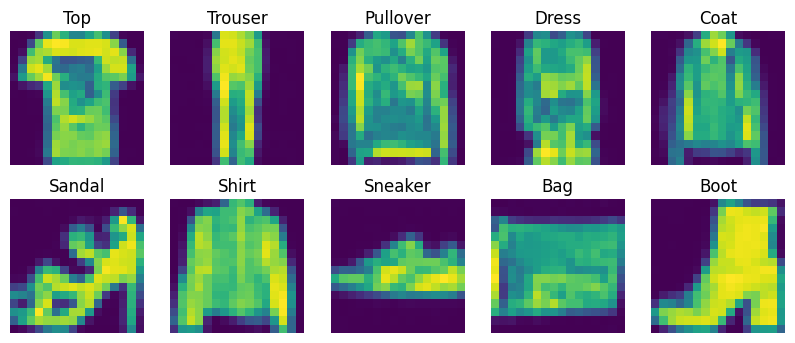

In [7]:
# generate an image for each image class
CLOTHING_TYPES = [
    'Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
    'Bag', 'Boot']
imgs = ss.generate(CLOTHING_TYPES)

# display images
num_rows = 2
num_cols = len(CLOTHING_TYPES) // 2
_, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols,
    figsize=(num_cols * 2, num_rows * 2))
for i in range(len(imgs)):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(imgs[i])
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{CLOTHING_TYPES[i]}')